# Introduction

Welcome to the next step in the series of notebooks focusing on feature engineering for the e-commerce clickstream and transaction dataset. In this notebook, we will dive deeper into the data to uncover new insights that we may not have explored before. Additionally, we will implement some simple machine learning techniques to create a small-scale predictive model based on this dataset.

This is the final notebook in this series. If you have any questions or feedback, please feel free to leave a comment in the discussion section. Should you require a more detailed response, you can also reach out to me directly.

**Notebook Series for E-Commerce Clickstream & Transaction Dataset:**

1. **E-Commerce C/T Data Exploration**  
   [View Notebook](https://www.kaggle.com/code/syaugialkaf/1-e-commerce-c-t-data-exploration)
   
2. **E-Commerce C/T Feature Engineering**  
   [View Notebook](https://www.kaggle.com/code/syaugialkaf/2-e-commerce-c-t-feature-engineering#Import-Necessary-Library)

# Data Load
## Import Necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

## Load the Data

In [2]:
file_path = '/kaggle/input/ecommerce-clickstream-transactions-enhanced/ecommerce_clickstream_transactions_enhanced.csv'
df = pd.read_csv(file_path)

In [3]:
df_complete = df
df_purchase = df[df['EventType'] == 'purchase']

## Creating Two Versions of the Data
To facilitate more focused analysis and machine learning, I’ve decided to split the dataset into two separate data frames. This division allows for specialized exploration and targeted model training, helping to streamline our workflow. By creating these two versions, each tailored to different aspects of the data, we can more effectively perform exploratory data analysis and apply machine learning techniques, ensuring a more organized and efficient approach to handling the dataset.

In [4]:
df_complete.head()

,UserID,Timestamp,Year,Month,Day,Hour,EventType,ProductID,Amount,Outcome,ProductCount,EventCount,DaysSinceLastPurchase,OneEventBeforePurchase,TwoEventBeforePurchase,ThreeEventBeforePurchase
0,1,2024-01-01 23:09:51.956825,2024,1,1,23,page_view,Unknown,0.0,0,0,1,0,0,0,0
1,1,2024-01-02 00:15:51.420238,2024,1,2,0,add_to_cart,prod_6144,0.0,0,1,2,1,0,0,0
2,1,2024-01-03 23:51:05.729189,2024,1,3,23,logout,Unknown,0.0,0,1,3,2,0,0,0
3,1,2024-01-04 09:25:49.705624,2024,1,4,9,add_to_cart,prod_1102,0.0,0,2,4,3,0,0,0
4,1,2024-01-04 17:09:29.677060,2024,1,4,17,click,Unknown,0.0,0,2,5,3,0,0,0


In [5]:
df_purchase = df_purchase.drop(columns=['OneEventBeforePurchase', 'TwoEventBeforePurchase', 'ThreeEventBeforePurchase'])
df_purchase.head()

,UserID,Timestamp,Year,Month,Day,Hour,EventType,ProductID,Amount,Outcome,ProductCount,EventCount,DaysSinceLastPurchase
9,1,2024-01-19 16:51:29.413903,2024,1,19,16,purchase,prod_6690,149.270047,1,4,9,18
21,1,2024-02-17 19:31:30.144156,2024,2,17,19,purchase,prod_2362,35.606156,1,4,10,29
33,1,2024-03-15 05:22:41.094810,2024,3,15,5,purchase,prod_5244,72.913619,1,3,10,27
34,1,2024-03-16 05:05:39.027675,2024,3,16,5,purchase,prod_3149,457.627967,1,3,10,1
50,1,2024-04-10 13:43:05.891055,2024,4,10,13,purchase,prod_5113,454.105277,1,8,14,25


# Data Analysis
In this section, we analyze the distribution of various features in the df_purchase dataset. We use visualizations and descriptive statistics to understand the data better.
## Data Distribution Analysis
To visualize the distribution of key variables, we generate histograms for the following features:

- ProductCount: The number of products in a transaction.
- EventCount: The number of events associated with a transaction.
- DaysSinceLastPurchase: The number of days since the customer’s last purchase.
- Month: The month in which the transaction occurred.
- Day: The day of the month on which the transaction occurred.
- Hour: The hour of the day during which the transaction took place.

The histograms provide insights into the frequency and distribution of these features, helping us identify patterns and anomalies.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

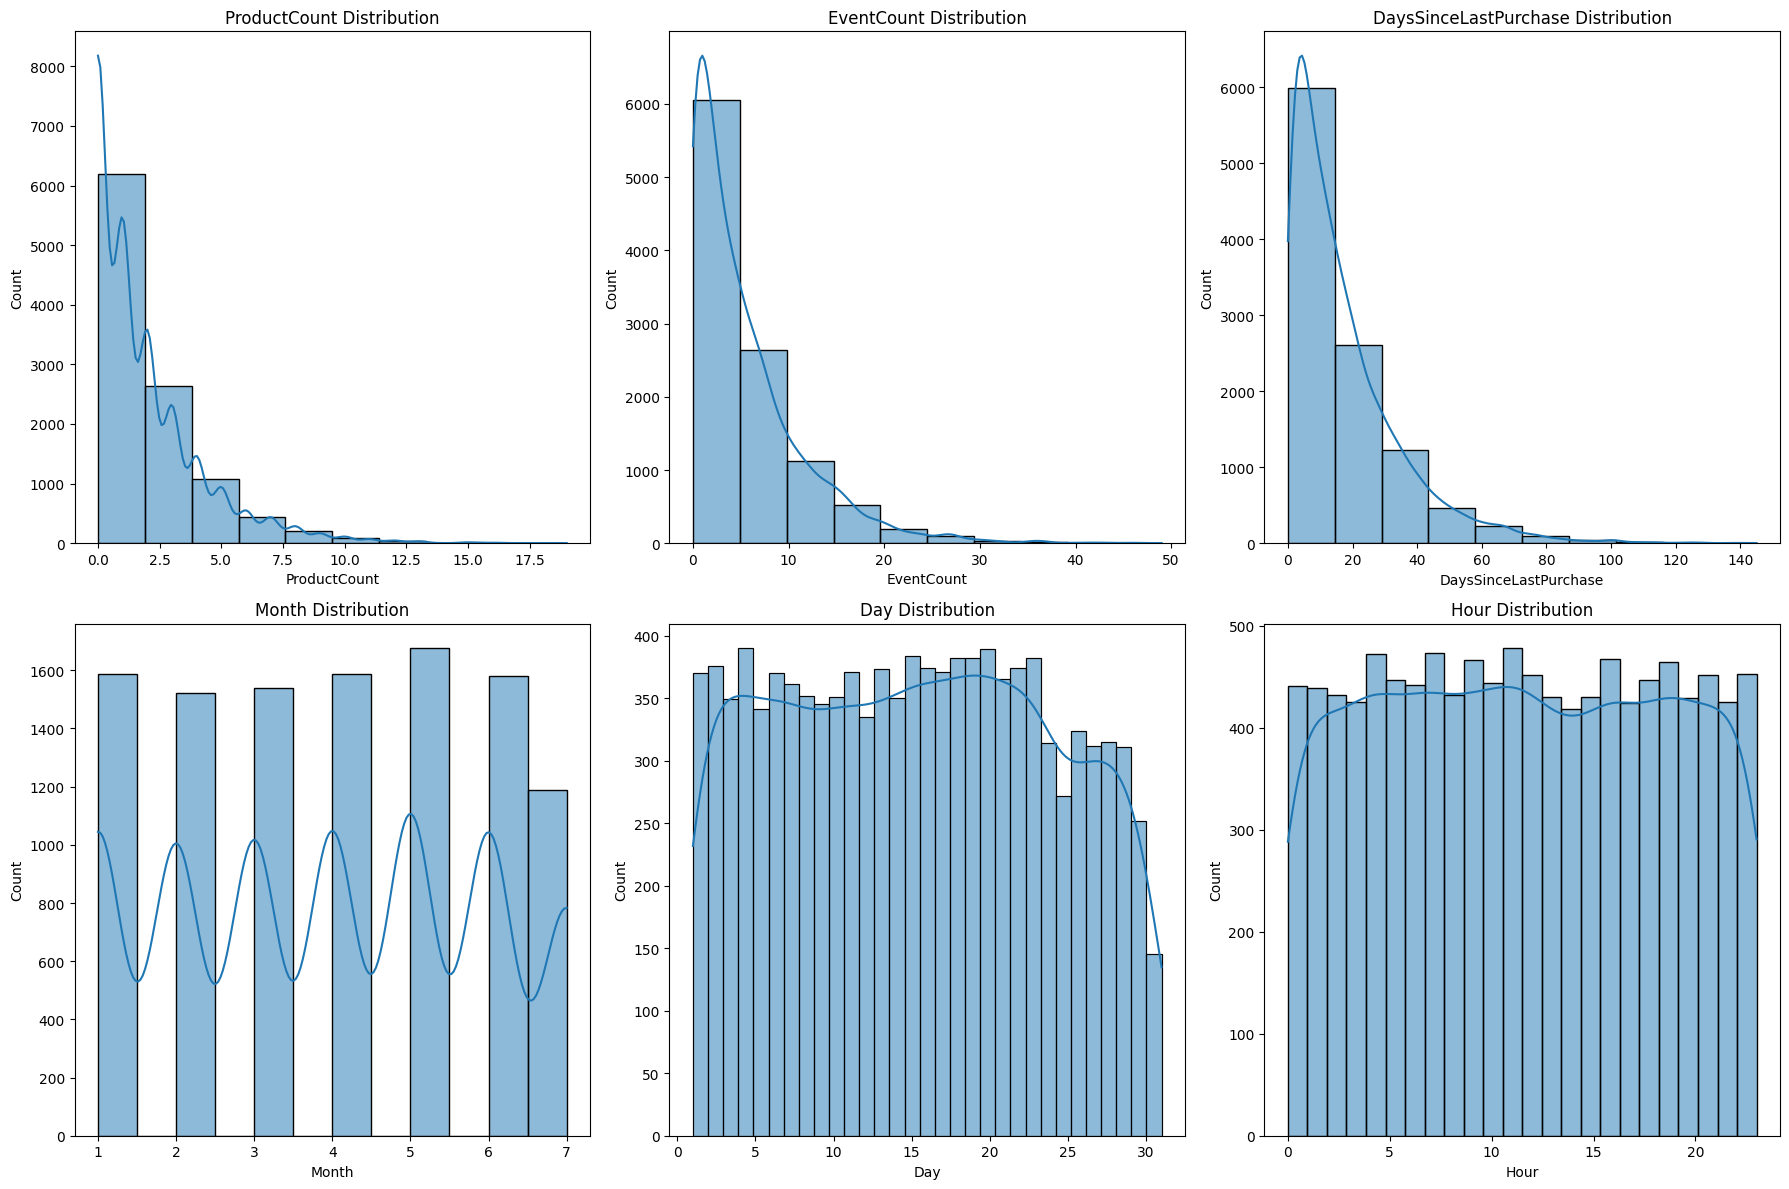

In [6]:
# Handle inf values
df_purchase.replace([np.inf, -np.inf], np.nan, inplace=True)

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# First row
sns.histplot(df_purchase['ProductCount'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('ProductCount Distribution')

sns.histplot(df_purchase['EventCount'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('EventCount Distribution')

sns.histplot(df_purchase['DaysSinceLastPurchase'], bins=10, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('DaysSinceLastPurchase Distribution')

# Second row
sns.histplot(df_purchase['Month'], bins=12, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Month Distribution')

sns.histplot(df_purchase['Day'], bins=31, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Day Distribution')

sns.histplot(df_purchase['Hour'], bins=24, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Hour Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

### Graphical Insights (Counts & Dates)

From the visualizations:

1. **First Row**:
   - **Product Count**: The histogram shows that lower product counts are more common, indicating that users often make purchases with fewer items.
   - **Event Count**: Similar to product count, lower event counts are more frequent, suggesting that transactions with fewer events are more typical.
   - **Days Since Last Purchase**: We observe that transactions are more likely when the number of days since the last purchase is lower, implying that frequent purchases are more common.

2. **Second Row**:
   - **Month**: The distribution across months appears relatively uniform, with no significant peaks or troughs. This suggests that purchases are distributed fairly evenly throughout the year.
   - **Day**: There is a noticeable decline in purchase activity towards the later days of the month (24th to 31st), indicating a decrease in purchasing frequency as the month progresses.
   - **Hour**: The distribution of purchases across hours is also relatively consistent, showing no significant variations throughout the day.

To gain more clarity, especially in the months and hours distributions, it would be helpful to look at the most frequent values:

- **Top 3 Months**: By analyzing the top months with the highest number of purchases, we can identify any seasonality or trends.
- **Top 3 Hours**: Examining the peak hours for purchases may reveal specific times when users are more active.

This focused analysis can provide more precise insights into user behavior patterns that are not immediately apparent from the overall distributions.

In [7]:
# Calculate max and average values
max_values = df_purchase[['ProductCount', 'EventCount', 'DaysSinceLastPurchase']].max()
avg_values = df_purchase[['ProductCount', 'EventCount', 'DaysSinceLastPurchase']].mean()

# Calculate top 3 most frequent values for Month, Day, and Hour
top_months = df_purchase['Month'].value_counts().head(3)
top_days = df_purchase['Day'].value_counts().head(3)
top_hours = df_purchase['Hour'].value_counts().head(3)

# Display the results
print("Max values:")
print(max_values)
print("\nAverage values:")
print(avg_values)
print("\nTop 3 Months:")
print(top_months)
print("\nTop 3 Days:")
print(top_days)
print("\nTop 3 Hours:")
print(top_hours)

Max values:
ProductCount              19
EventCount                49
DaysSinceLastPurchase    145
dtype: int64

Average values:
ProductCount              1.828777
EventCount                5.447107
DaysSinceLastPurchase    17.352837
dtype: float64

Top 3 Months:
Month
5    1676
1    1589
4    1586
Name: count, dtype: int64

Top 3 Days:
Day
4     390
20    389
15    384
Name: count, dtype: int64

Top 3 Hours:
Hour
11    478
7     473
4     472
Name: count, dtype: int64


### Observations (Top 3 Value)

1. **Product and Event Counts**:
   - The maximum values for product and event counts are significantly higher than the average values, suggesting that most transactions involve fewer products and events.
   - This aligns with the histograms, where lower counts are more common.

2. **Days Since Last Purchase**:
   - The wide range between the maximum (145 days) and the average (17.35 days) indicates variability in purchasing frequency among users.
   - This supports the histogram observation that more frequent purchases are typical.

3. **Monthly Distribution**:
   - Transactions are notably high in May, January, and April. This could indicate seasonal trends or promotional activities during these months.

4. **Daily and Hourly Patterns**:
   - Peak activity is observed on the 4th, 20th, and 15th days of the month.
   - The highest transaction hours are 11 AM, 7 AM, and 4 AM, which could be linked to user behavior patterns or operational factors.

These insights provide a foundation for deeper analysis and can help tailor strategies for marketing, inventory management, and user engagement.

## Event Leads to Purchase
By the feature we engineered before `OneEventBeforePurchase`, `TwoEventBeforePurchase`, `ThreeEventBeforePurchase`. We might identify the most event that leads to user's purchase.

In [8]:
# Filter rows where OneEventBeforePurchase has a non-null value
filtered_1 = df_complete[df_complete['OneEventBeforePurchase'] == 1]
filtered_2 = df_complete[df_complete['TwoEventBeforePurchase'] == 1]
filtered_3 = df_complete[df_complete['ThreeEventBeforePurchase'] == 1]

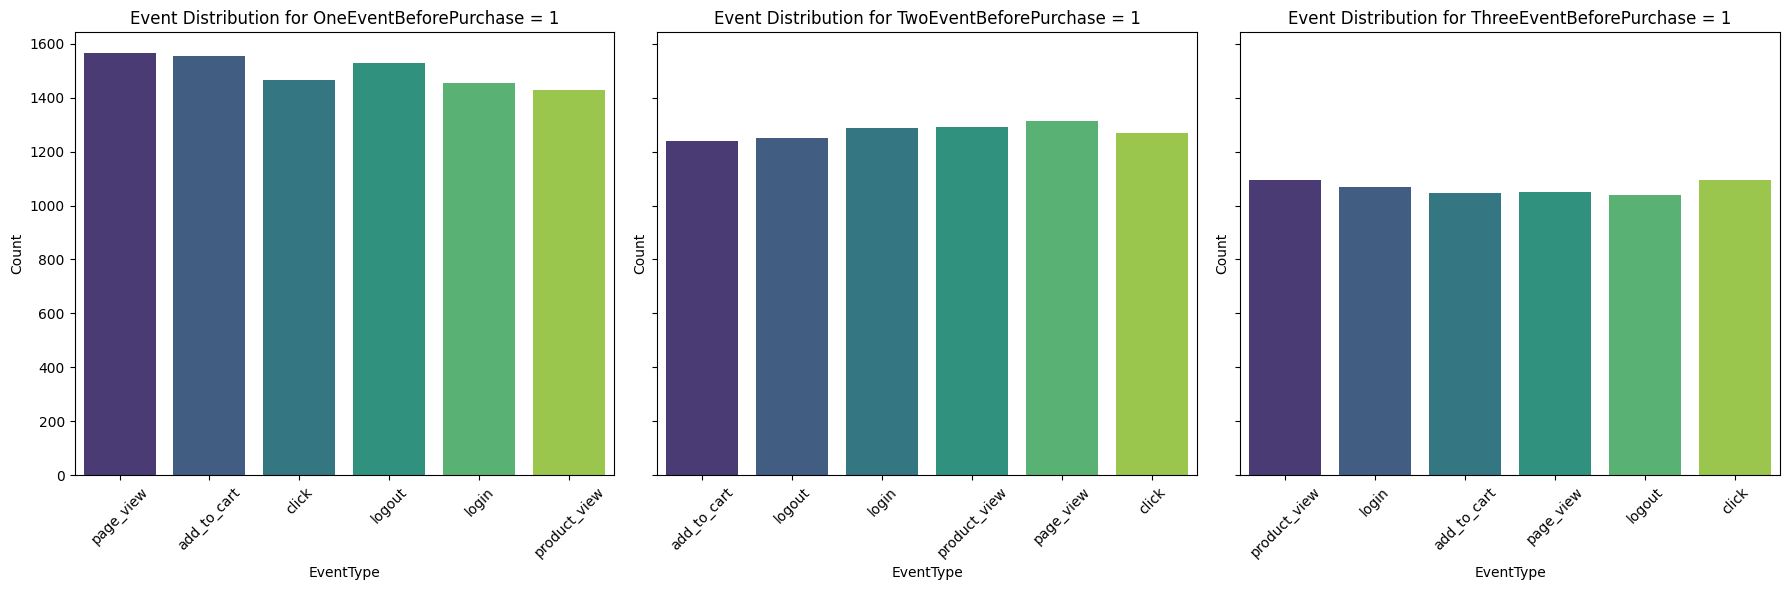

In [9]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for OneEventBeforePurchase
sns.countplot(ax=axes[0], data=filtered_1, x='EventType', palette='viridis')
axes[0].set_title('Event Distribution for OneEventBeforePurchase = 1')
axes[0].set_xlabel('EventType')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot for TwoEventBeforePurchase
sns.countplot(ax=axes[1], data=filtered_2, x='EventType', palette='viridis')
axes[1].set_title('Event Distribution for TwoEventBeforePurchase = 1')
axes[1].set_xlabel('EventType')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Plot for ThreeEventBeforePurchase
sns.countplot(ax=axes[2], data=filtered_3, x='EventType', palette='viridis')
axes[2].set_title('Event Distribution for ThreeEventBeforePurchase = 1')
axes[2].set_xlabel('EventType')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

The graph was nearly stagnant, but there is something here. Can you see the `page_view` and `product_view` are tend to having a higest count? let's we confirm it by taking the top 3 value on each.

In [10]:
def top_events(df, column_name, top_n=3):
    """
    Count occurrences of each EventType and get the top_n events.
    """
    event_counts = df['EventType'].value_counts().reset_index()
    event_counts.columns = ['EventType', column_name]
    top_events = event_counts.head(top_n)
    return top_events

# Get top 3 events for each filtered DataFrame
top_events_1 = top_events(filtered_1, 'Count_OneEventBeforePurchase')
top_events_2 = top_events(filtered_2, 'Count_TwoEventBeforePurchase')
top_events_3 = top_events(filtered_3, 'Count_ThreeEventBeforePurchase')


In [11]:
print("Top 3 Events for OneEventBeforePurchase:")
print(top_events_1)
print("\nTop 3 Events for TwoEventBeforePurchase:")
print(top_events_2)
print("\nTop 3 Events for ThreeEventBeforePurchase:")
print(top_events_3)


Top 3 Events for OneEventBeforePurchase:
     EventType  Count_OneEventBeforePurchase
0    page_view                          1564
1  add_to_cart                          1553
2       logout                          1527

Top 3 Events for TwoEventBeforePurchase:
      EventType  Count_TwoEventBeforePurchase
0     page_view                          1314
1  product_view                          1293
2         login                          1289

Top 3 Events for ThreeEventBeforePurchase:
      EventType  Count_ThreeEventBeforePurchase
0  product_view                            1095
1         click                            1095
2         login                            1067


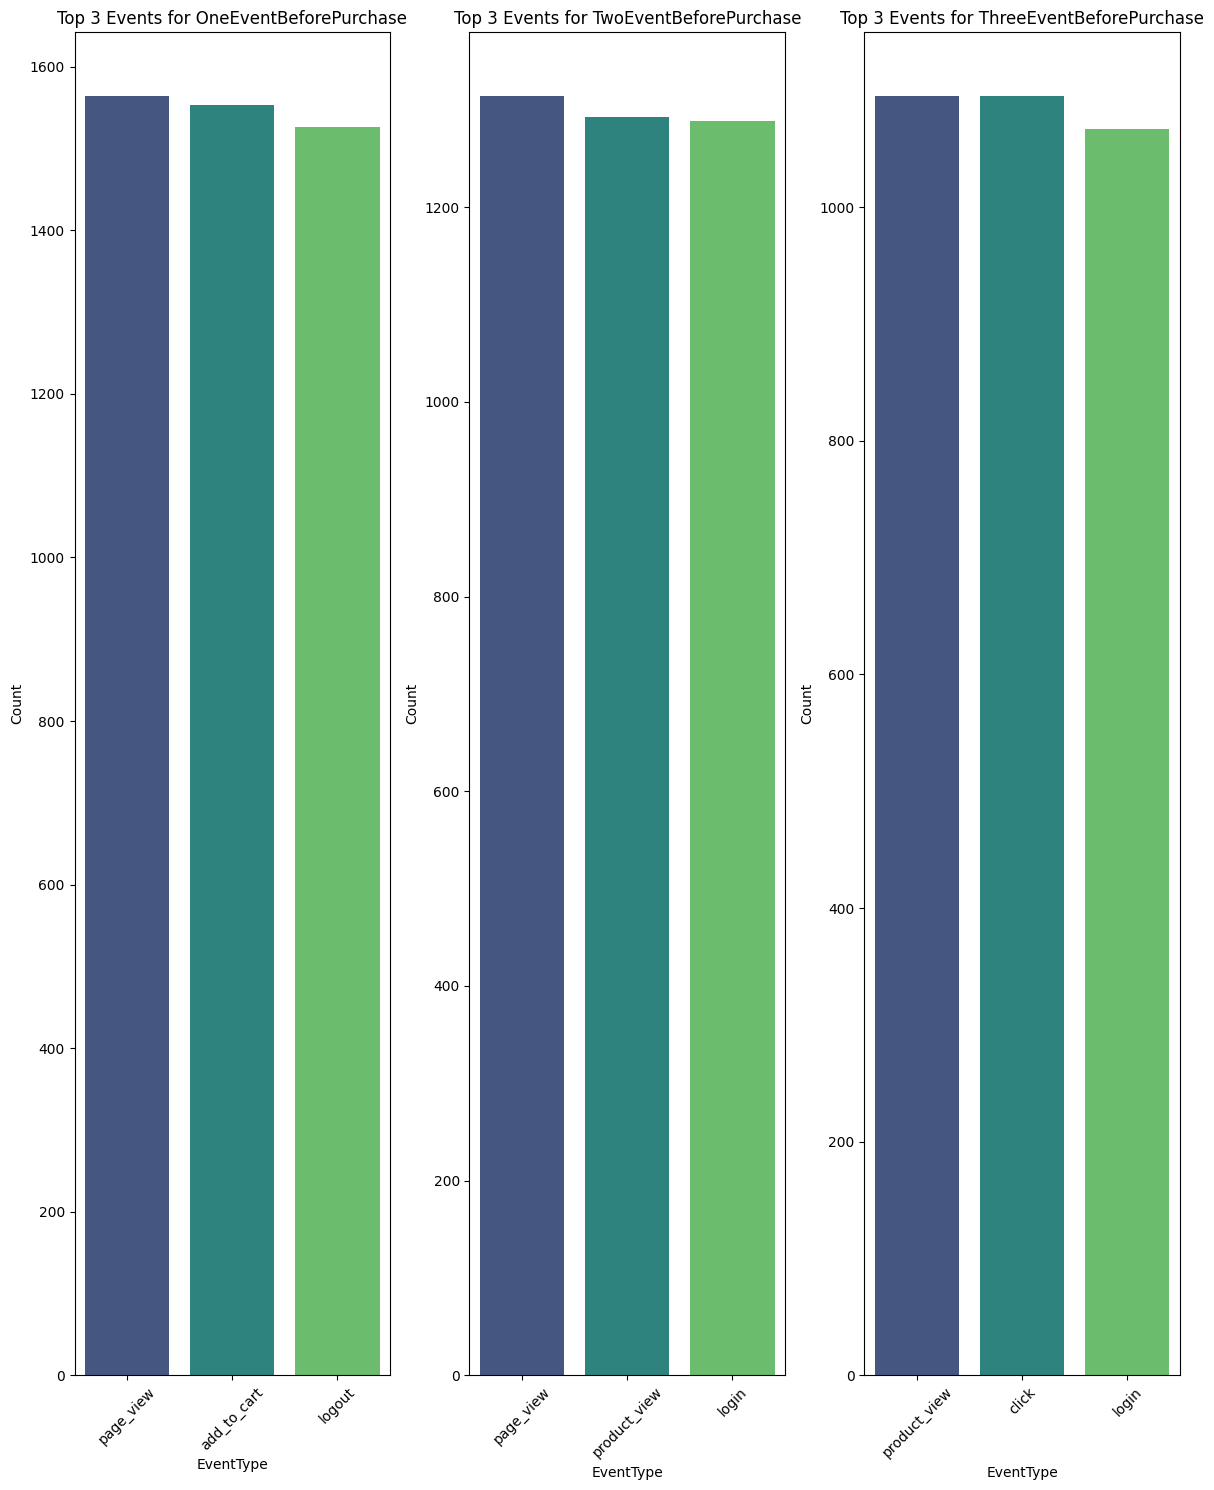

In [12]:
def plot_top_events_row(top_events_dfs, titles):
    """
    Plot a row of bar charts for the top events.
    """
    num_plots = len(top_events_dfs)
    plt.figure(figsize=(12, 5 * num_plots))
    
    for i, (top_events_df, title) in enumerate(zip(top_events_dfs, titles)):
        plt.subplot(1, num_plots, i + 1)
        sns.barplot(data=top_events_df, x='EventType', y=top_events_df.columns[1], palette='viridis')
        plt.title(title)
        plt.xlabel('EventType')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Prepare lists of DataFrames and titles
top_events_dfs = [top_events_1, top_events_2, top_events_3]
titles = [
    'Top 3 Events for OneEventBeforePurchase',
    'Top 3 Events for TwoEventBeforePurchase',
    'Top 3 Events for ThreeEventBeforePurchase'
]

# Plot the bar charts in a row
plot_top_events_row(top_events_dfs, titles)

### Observations (Event Lead to Purchase)

Before making a purchase, users commonly engage in the following events: right before buying, **Page View** (1,564 times) and **Add to Cart** (1,553 times) are prevalent, suggesting users are highly engaged with product pages and preparing to finalize their purchase, while **Logout** (1,527 times) often marks the end of their shopping session. Two steps before purchase, **Page View** (1,314 times) and **Product View** (1,293 times) are key, showing that users browse and explore products before committing, and **Login** (1,289 times) indicates preparation for account-related actions. Three steps prior, **Product View** (1,095 times) and **Click** (1,095 times) are significant for exploring products, with **Login** (1,067 times) suggesting users are accessing features or personalizing their experience.

- **Page Views**: Consistently high in all stages before purchase, highlighting its role in user engagement and purchase intent.
- **Product Views**: Notable at the two-event and three-event stages, reinforcing the importance of product interaction.
- **Add to Cart and Login**: Their occurrence right before and two actions before purchase shows their role in the final stages of the purchasing process.

### Insights

- **Engagement Patterns**: Users frequently engage with pages and products in the lead-up to purchases, which may inform strategies for optimizing user experience and conversion rates.
- **Event Timing**: Understanding the sequence of events leading to purchases can help in designing targeted interventions and improving user journey mapping.

# Making User's Purchase Probability Prediction
## Data Frame Backup
To ensure we don't modify the original dataset, we'll create a backup of df_complete

In [13]:
df_n = df_complete

## Data Cleaning
We start by cleaning the dataset. Unnecessary columns are dropped to simplify the data

In [14]:
df_n = df_n.drop(columns=['UserID', 'Timestamp', 'ProductID', 'OneEventBeforePurchase', 'TwoEventBeforePurchase', 'ThreeEventBeforePurchase'])
# df_n = df_n.drop(columns=['EventType_code', 'OneEventBeforePurchase_code'])

In [15]:
df_n.head()

,Year,Month,Day,Hour,EventType,Amount,Outcome,ProductCount,EventCount,DaysSinceLastPurchase
0,2024,1,1,23,page_view,0.0,0,0,1,0
1,2024,1,2,0,add_to_cart,0.0,0,1,2,1
2,2024,1,3,23,logout,0.0,0,1,3,2
3,2024,1,4,9,add_to_cart,0.0,0,2,4,3
4,2024,1,4,17,click,0.0,0,2,5,3


## Convert Categorical Variables to Numerical
Convert the categorical EventType variable to numerical codes for machine learning

In [16]:
# Convert categorical variable to numerical
df_n['EventType'] = df_n['EventType'].astype('category').cat.codes

## Define Features and Target
Separate the features (X) from the target variable (y)

In [17]:
# Define features (X) and target (y)
X = df_n.drop(columns=['Outcome'])
y = df_n['Outcome']

## Split the Data
Divide the data into training (80%) and testing (20%) sets

In [18]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training
### Create a Pipeline
Construct a pipeline that standardizes the data and applies a logistic regression model

The pipeline includes:
- StandardScaler: Standardizes features by removing the mean and scaling to unit variance.
- LogisticRegression: A logistic regression model for classification.

In [19]:
# Create a pipeline that preprocesses the data and then applies a model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', LogisticRegression())  # Logistic Regression model
])

## Train the Model
Fit the model using the training data

In [20]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

## Model Testing

In [21]:
# Predict probabilities on the test set
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Convert probabilities to percentage
y_prob_percent = y_prob * 100

# Predict binary outcomes based on the probability threshold (e.g., 0.5)
y_pred = (y_prob >= 0.5).astype(int)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# Display probabilities and percentages for the first few test samples
results = pd.DataFrame({
    'Probability': y_prob,
    'Probability (%)': y_prob_percent,
    'Predicted': y_pred,
    'Actual': y_test
})

print(results.head())

Accuracy: 1.0
ROC AUC Score: 0.9999999999999999
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12743
           1       1.00      1.00      1.00      2221

    accuracy                           1.00     14964
   macro avg       1.00      1.00      1.00     14964
weighted avg       1.00      1.00      1.00     14964

        Probability  Probability (%)  Predicted  Actual
30862  1.314591e-09     1.314591e-07          0       0
21696  9.251055e-13     9.251055e-11          0       0
54163  4.093569e-16     4.093569e-14          0       0
14463  4.958205e-16     4.958205e-14          0       0
63524  1.349822e-12     1.349822e-10          0       0


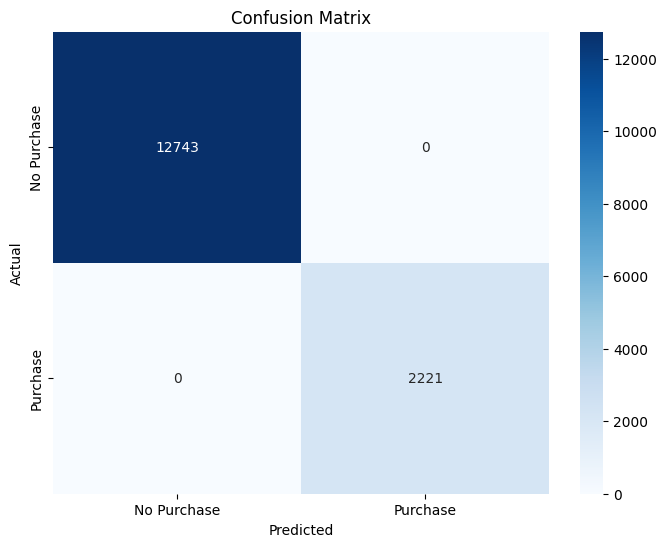

In [22]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Purchase', 'Purchase'], 
            yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The testing results model show outstanding performance, with an accuracy of 1.0 and an ROC AUC score of 1.0, indicating that the model classified all instances correctly and exhibited perfect discrimination between classes. The classification report also confirms this high performance, with precision, recall, and F1-scores of 1.00 for both classes, suggesting flawless predictions across the board. The predicted probabilities are extremely close to 0 for both classes, reinforcing the model’s strong confidence in its predictions.

However, this perfect performance raises concerns about potential overfitting. Such results could indicate that the model has learned to perform exceptionally well on the specific test data, but may not generalize effectively to new or unseen data. To address this, it is important to validate the model using a separate validation set or through cross-validation to ensure it maintains its performance in diverse scenarios. Additionally, verifying that the test data is representative and not imbalanced will help confirm the model's robustness and reliability.

In [23]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of accuracy: {cv_scores.std():.4f}")

Cross-validation accuracy scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0000
Standard deviation of accuracy: 0.0000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


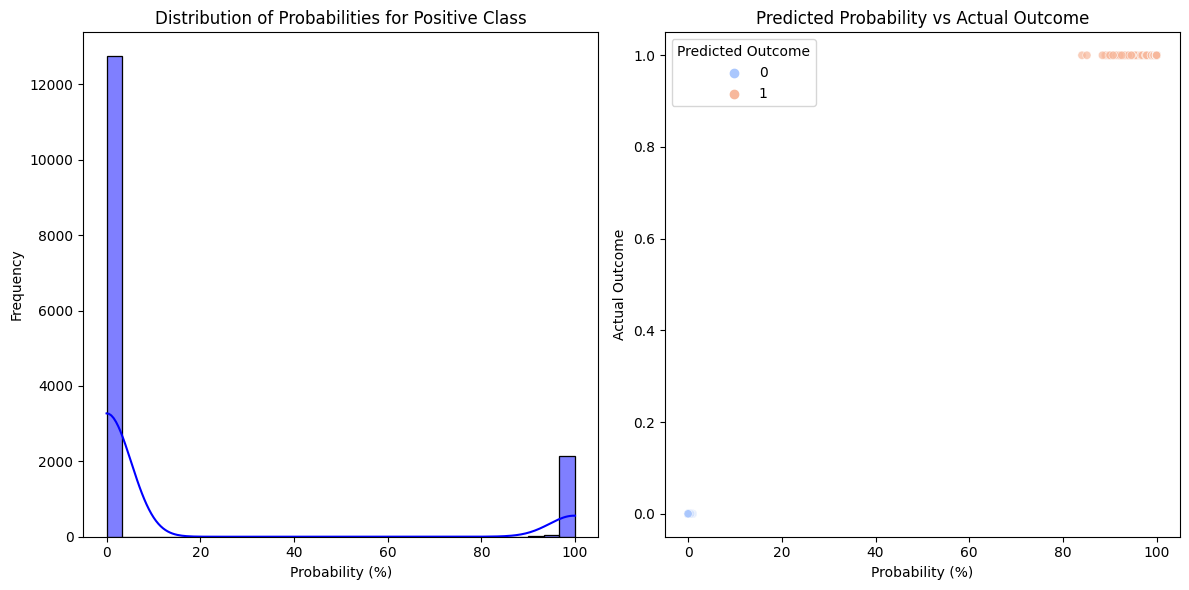

In [24]:
# Visualization
plt.figure(figsize=(12, 6))

# Distribution of probabilities for positive class
plt.subplot(1, 2, 1)
sns.histplot(results['Probability (%)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Probabilities for Positive Class')
plt.xlabel('Probability (%)')
plt.ylabel('Frequency')

# Comparison of predicted vs actual outcomes
plt.subplot(1, 2, 2)
sns.scatterplot(x=results['Probability (%)'], y=results['Actual'], hue=results['Predicted'], palette='coolwarm', alpha=0.7)
plt.title('Predicted Probability vs Actual Outcome')
plt.xlabel('Probability (%)')
plt.ylabel('Actual Outcome')
plt.legend(title='Predicted Outcome')

plt.tight_layout()
plt.show()

## Summary
Given the significant dynamic in the dataset between purchased and non-purchased instances—distinguished only by binary values—the model’s performance indicates that it is effectively capturing the underlying patterns. The model achieved perfect accuracy and ROC AUC scores, which suggest it is highly effective at distinguishing between users who make a purchase and those who do not. This is particularly promising given the binary nature of the target variable in your dataset. With the cross-validation results, you’ve further validated the model’s robustness and generalization ability, ensuring it performs well across different subsets of data.

# User's Purchase Probability in Action

In [25]:
# Define new input data
new_data = pd.DataFrame({
    'Year': [2024],
    'Month': [4],
    'Day': [20],
    'Hour': [14],
    'EventType': [5],
    'Amount': [167.346000],
    'ProductCount': [8],
    'EventCount': [10],
    'DaysSinceLastPurchase': [1]
})

# Make predictions
probability = pipeline.predict_proba(new_data)[:, 1]  # Probability of the positive class (purchase)
probability_percent = probability[0] * 100  # Convert to percentage

# Output the result
print(f'Probability of purchasing the product = {probability_percent:.2f}%')

Probability of purchasing the product = 96.82%


In [26]:
# Define new input data
new_data = pd.DataFrame({
    'Year': [2024],
    'Month': [3],
    'Day': [1],
    'Hour': [1],
    'EventType': [5],
    'Amount': [0.00000],
    'ProductCount': [4],
    'EventCount': [2],
    'DaysSinceLastPurchase': [13]
})

# Make predictions
probability = pipeline.predict_proba(new_data)[:, 1]  # Probability of the positive class (purchase)
probability_percent = probability[0] * 100  # Convert to percentage

# Output the result
print(f'Probability of purchasing the product = {probability_percent:.2f}%')

Probability of purchasing the product = 0.18%


The model performs well in distinguishing between users who make a purchase and those who do not, given the binary nature of the target variable. However, there is room for improvement. To enhance its performance, consider using larger datasets and exploring more advanced models or algorithms. While the current model effectively predicts purchase behavior based on the existing data, further refinement and expansion could lead to even better accuracy and insights.